In [1]:
import pandas as pd
import datetime as dt
import numpy as np

import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
IN_PATH = '/Users/anokhin/Desktop/train1_matched'
OUT_PATH = '/Users/anokhin/Desktop/unicredit_deposit.la.jss'

In [3]:
ts_parser = lambda ts: dt.datetime.strptime(ts, "%Y%m%d")
df1 = pd.read_csv(
    IN_PATH, sep="\t", 
    header=None, names=['cuid', 'match', 'emails', 'okids', 'vkids', 'age', 'sex', 'retro_dt'],
    converters={'retro_dt': ts_parser},
    dtype={"okids": str, "vkids": str}
)
print df1["retro_dt"].min()
df1.head()

2016-05-16 00:00:00


,cuid,match,emails,okids,vkids,age,sex,retro_dt
0,9005998899,5,OVMeird4ZQzNO7UWFv8sB4FZ5jAGYw5E,NaN,5098112,0.211675,1.0,2016-07-01
1,9013002453,3,NaN,NaN,20815142,0.664691,1.0,2016-06-07
2,9013005077,5,NaN,109629095762,"723807,27454488",0.499219,0.0,2016-07-01
3,9013005077,0,mShlB/cSJQFbI02of+SFkYFZ5jAGYw5E,NaN,NaN,0.499219,0.0,2016-07-01
4,9013062332,3,NaN,NaN,368299610,0.729167,0.0,2016-07-01


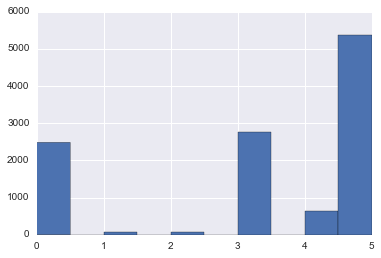

In [4]:
df1.match.hist()

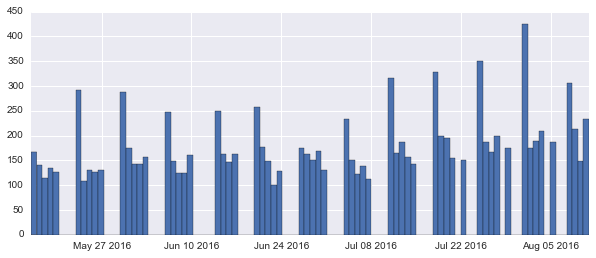

In [7]:
pl.figure(figsize=(10, 4))
df1['retro_dt'].hist(bins=100)
pl.show()

In [8]:
USER_PATTERN = '{"vid":"%s","okid":%s,"email":%s,"vkid":%s,"category":{"int":%d},"start":{"long":%d},"end":{"long":%d}}'
STRING_PATTERN = '{"string":"%s"}'
MONTH_SECONDS = 31 * 24 * 60 * 60

In [9]:
with open(OUT_PATH, "w") as out_file:
    for i, row in df1[df1.match >= 3].iterrows():
        end_ts = int(row["retro_dt"].strftime("%s"))
        start_ts = end_ts - MONTH_SECONDS        
        
        emails = row["emails"].split(",") if pd.notnull(row["emails"]) else [""]
        okids = row["okids"].split(",") if pd.notnull(row["okids"]) else [""]
        vkids = row["vkids"].split(",") if pd.notnull(row["vkids"]) else [""]
        
        for email in emails:
            for okid in okids:
                for vkid in vkids:
                    em = STRING_PATTERN % email if email else "null"
                    ok = STRING_PATTERN % okid if okid else "null"
                    vk = STRING_PATTERN % vkid if vkid else "null"
                    print >> out_file, USER_PATTERN % ("", ok, em, vk, 1, start_ts, end_ts)

In [10]:
%%bash
head /Users/anokhin/Desktop/train1_matched
head /Users/anokhin/Desktop/unicredit_deposit.la.jss

9005998899	5	OVMeird4ZQzNO7UWFv8sB4FZ5jAGYw5E		5098112	0.211675	1.00	20160701
9013002453	3			20815142	0.664691	1.00	20160607
9013005077	5		109629095762	723807,27454488	0.499219	0.00	20160701
9013005077	0	mShlB/cSJQFbI02of+SFkYFZ5jAGYw5E			0.499219	0.00	20160701
9013062332	3			368299610	0.729167	0.00	20160701
9013064860	5	LsNmtHf33qnUNBdSwhgwXw==		1154751	0.384441	1.00	20160805
9015107780	5		47735284519		0.421863	0.00	20160725
9021700694	0	Y7jQkT4k8Q2ImHFoapNNw0tsxnhZrame5NURDqEK9Us=,TBbhLXHCyEzyzOX5DFkU8NQ0F1LCGDBf,Y7jQkT4k8Q2dd11kZzE99eTVEQ6hCvVL,9UuE2AwkZtJ1yqhRxPqQf09WhNM9oR5n,FzwRqSF2obseTpvv0O5uV4QcyRh9bMJK	509461548432,509673594038	313443538	0.724849	0.00	20160711
9021925622	5		332960575166	35332576	0.600751	1.00	20160614
9021925622	3		366910467615		0.600751	1.00	20160614
{"vid":"","okid":null,"email":{"string":"OVMeird4ZQzNO7UWFv8sB4FZ5jAGYw5E"},"vkid":{"string":"5098112"},"category":{"int":1},"start":{"long":1464642000},"end":{"long":1467320400}}
{"vid":"","okid":null,"email":n

In [11]:
%%bash

wc -l /Users/anokhin/Desktop/unicredit_deposit.la.jss

    9768 /Users/anokhin/Desktop/unicredit_deposit.la.jss
